In [3]:
import os
import json
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [12]:
data_dir = DATA_FOLDER
meta_data_dir = data_dir+"Metadata/"
binned_data_dir=data_dir+"Pre-Processed_Data/data-ms-aggregates/"

lr_dir = data_dir+"Pre-Processed_Data/LR/"
feature_of_interest = "DF"
feature_of_interest_folder = lr_dir+feature_of_interest+ "/"
models_folder = feature_of_interest_folder+"Models/"
evaluation_folder = feature_of_interest_folder+"Evaluation/"
test_data_folder = feature_of_interest_folder+"Test/"

In [14]:
evaluation_files = os.listdir(evaluation_folder)
train_evaluations_fns = [x for x in evaluation_files if str.__contains__(x, "train")]
test_evaluations_fns = [x for x in evaluation_files if str.__contains__(x, "test")]

train_evaluations = {}
for fn in train_evaluations_fns:
    bin = int(fn[5:9])
    fp = evaluation_folder+fn
    with open(fp, "r") as f:
        ev_dict = json.load(f)
        ev_dict = {k:v["mean"] for k,v in ev_dict.items()}
    train_evaluations[bin] = ev_dict

train_evaluations_all = pd.DataFrame(train_evaluations).T
train_evaluations_all = train_evaluations_all.sort_index()
display(train_evaluations_all)

test_evaluations = {}
for fn in test_evaluations_fns:
    bin = int(fn[5:9])
    fp = evaluation_folder+fn
    with open(fp, "r") as f:
        ev_dict = json.load(f)
    test_evaluations[int(bin)] = ev_dict['weighted avg']

test_evaluations = pd.DataFrame(test_evaluations).T
test_evaluations = test_evaluations.sort_index()
test_evaluations = test_evaluations.drop("support", axis=1)
display(test_evaluations)


,accuracy,f1_macro,fit_time,precision_macro,recall_macro,score_time
10,0.695238,0.681890,10.863569,0.724324,0.691511,0.007225
20,0.697143,0.686241,28.154504,0.726825,0.697367,0.018210
30,0.698286,0.689288,9.594448,0.733024,0.696167,0.007812
40,0.703619,0.695238,159.910651,0.737554,0.703200,0.122539
50,0.722857,0.709427,24.548375,0.747825,0.719111,0.019825
...,...,...,...,...,...,...
960,0.749714,0.743157,177.479082,0.780325,0.751978,0.108401
970,0.762476,0.748049,22.819007,0.784503,0.756200,0.014262
980,0.771810,0.762611,73.701864,0.801415,0.771267,0.040216
990,0.772190,0.763172,10.221099,0.799924,0.769567,0.008492


,f1-score,precision,recall
10,0.601276,0.655735,0.605333
20,0.636859,0.683032,0.634667
30,0.590241,0.657864,0.590667
40,0.626779,0.703450,0.620000
50,0.592664,0.635311,0.596000
...,...,...,...
960,0.721765,0.766289,0.718667
970,0.691904,0.740903,0.690667
980,0.558130,0.624340,0.574667
990,0.690300,0.740025,0.686667


In [15]:
train_evaluations = train_evaluations_all[["accuracy", "f1_macro", "precision_macro", "recall_macro"]]
train_evaluations.columns = ["accuracy", "f1-score", "precision", "recall"]
train_evaluations = train_evaluations
#TODO get model accuracies

<Axes: >

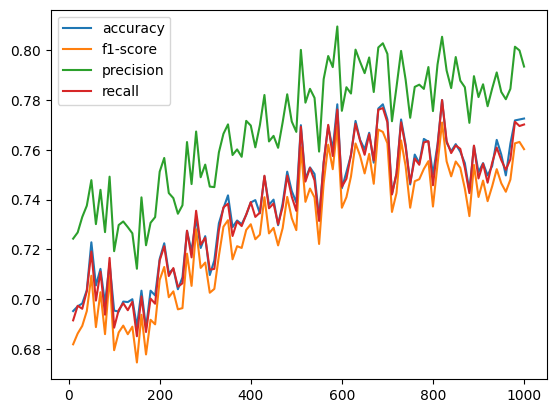

In [16]:
train_evaluations.plot()

<Axes: >

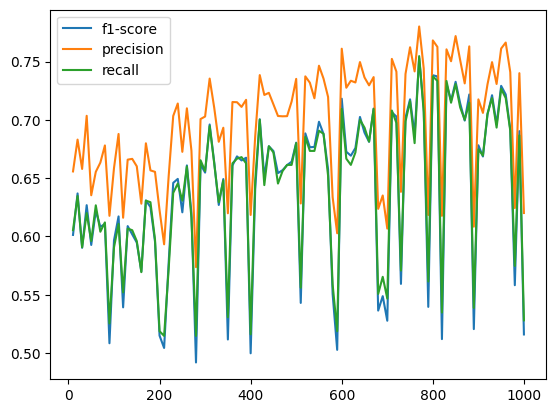

In [17]:
# Here Recall = Accuracy
test_evaluations.plot()

In [18]:
# Choose midpoint between training and testing max accuracy for binsiz
min_p = np.argmax(test_evaluations.recall)
max_p = np.argmax(train_evaluations.recall)
mid_p = min_p+(max_p-min_p)/2
mid_p

78.5

In [19]:
train_evaluations.index[int(mid_p)]

790

In [11]:
# 3. select best widening window
# 4. calculate sliding window accuracy
# 5. create open world model with an extra class of 50 random samples, test out with a set with a larger sample of unknowns
# 6. inspect autocorrelation


